In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from specim_test.specim.specfuncs import spec2d, spec1d
from astropy.io import fits as pf

In [5]:
file_list = ['J2103_LRIS_spectra/J2103_coadd2d_sp_red.fits', 'J2103_LRIS_spectra/J2103_coadd2d_var_red.fits',
             'J2103_LRIS_spectra/J2103_coadd2d_sp.fits', 'J2103_LRIS_spectra/J2103_coadd2d_var.fits']

In [13]:
spec_r = spec2d.Spec2d(file_list[0], hext=0, invar=file_list[1], ytrim=[30, 110])
spec_b = spec2d.Spec2d(file_list[2], hext=0, invar=file_list[3], ytrim=[30, 120])


Loading file J2103_LRIS_spectra/J2103_coadd2d_sp_red.fits
-----------------------------------------------

Loading file J2103_LRIS_spectra/J2103_coadd2d_var_red.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J2103_LRIS_spectra/J2103_coadd2d_sp_red.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4128.  yrange: 30:111
Final data dimensions (x y): 4128 x 81

Dispersion axis:              x
N_pixels along dispersion axis: 4128


Loading file J2103_LRIS_spectra/J2103_coadd2d_sp.fits
-----------------------------------------------

Loading file J2103_LRIS_spectra/J2103_coadd2d_var.fits
-----------------------------------------------
Read in 2-dimensional spectrum from J2103_LRIS_spectra/J2103_coadd2d_sp.fits (HDU=0)
The input dataset was trimmed
 xrange: 0:4096.  yrange: 30:121
Final data dimensions (x y): 4096 x 91

Dispersion axis:              x
N_pixels along dispersion axis: 4096



Profile max value (before normalization) 364.622759


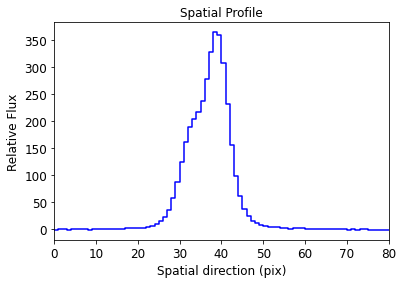


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 2

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 350, 40, 3, 4

amplitude=350.000000, x_0=40.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 40, 35, 2, 3

amplitude=40.000000, x_0=35.000000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 100, 32, 3, 4

amplitude=100.000000, x_0=32.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.44162633)>

    [1]: <Moffat1D(amplitude=303

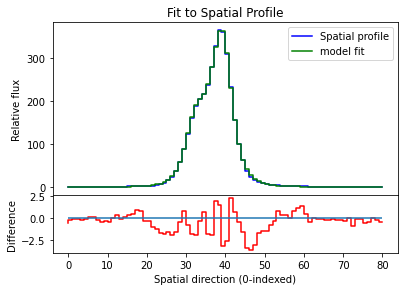

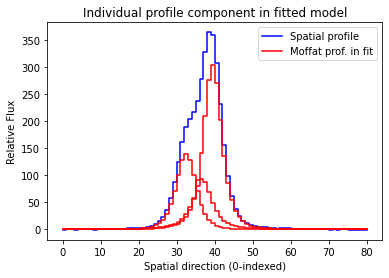


Do you want to start over ? : type yes/no
no


In [22]:
spec_r.spatial_profile(pixrange=[2100, 2400])
plt.show()
mod0 = spec_r.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.44162633)>

    [1]: <Moffat1D(amplitude=303.59797801, x_0=39.94993918, gamma=4.42864715, alpha=2.06844002)>

    [2]: <Moffat1D(amplitude=93.50421114, x_0=37.25189255, gamma=3.49918883, alpha=1.34800052)>

    [3]: <Moffat1D(amplitude=140.29697491, x_0=32.98745012, gamma=5.44258899, alpha=2.59406884)>
Parameters:
            c0_0            amplitude_1     ...      alpha_3      
    -------------------- ------------------ ... ------------------
    -0.44162633403494167 303.59797801255854 ... 2.5940688367415747

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=0.14211896)>

    [1]: <Moffat1D(amplitude=329.93568268, x_0=39.70974741, gamma=5.463

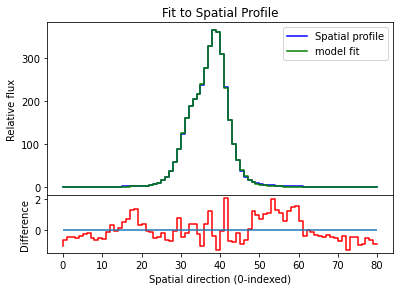

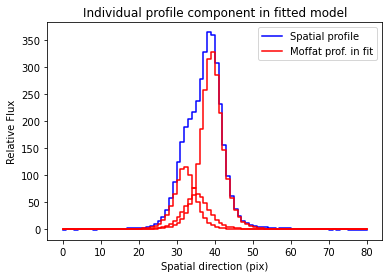

In [23]:
def tie_pos1_moffat(model):
     return model.x_0_1 - 4
            
def tie_pos2_moffat(model):
    return model.x_0_1 - 7

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#for sp in spec_list:
#spec1.mod0[2].x_0.tied = tie_pos1_moffat
spec_r.mod0[2].x_0.tied = tie_pos1_moffat
spec_r.mod0[3].x_0.tied = tie_pos2_moffat
#spec1.mod0[2].gamma.tied = tie_gamma_moffat
#spec1.mod0[2].alpha.tied = tie_alpha_moffat
spec_r.mod0[3].gamma.tied = tie_gamma_moffat
spec_r.mod0[3].alpha.tied = tie_alpha_moffat
spec_r.refined_model(mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 165 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


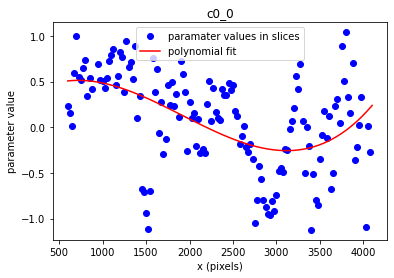

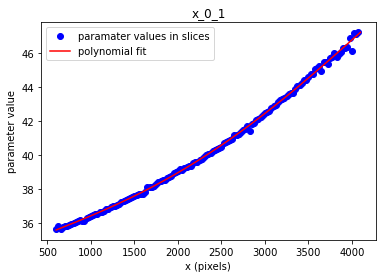

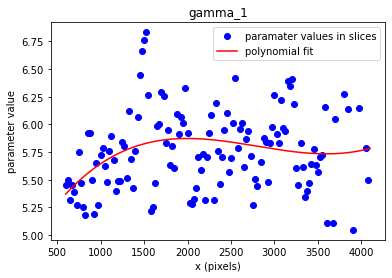

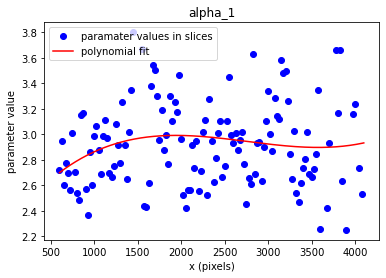

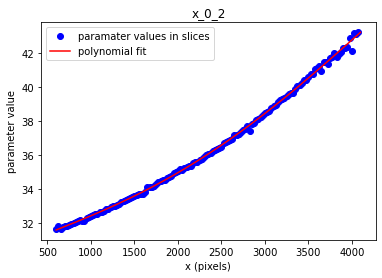

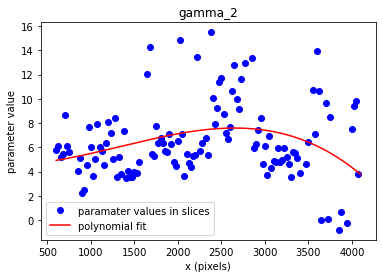

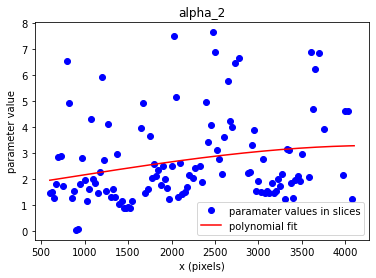

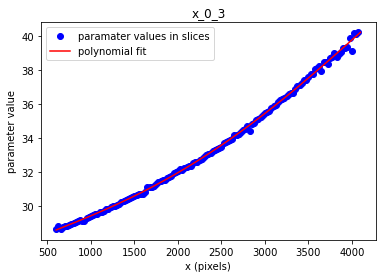

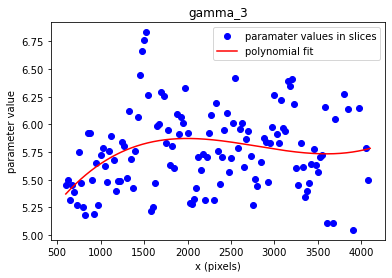

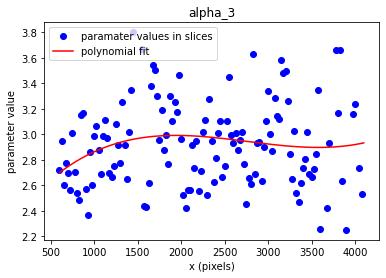

In [27]:
spec_r.find_and_trace(spec_r.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'mean_1':4},
                    fitrange=[600, 4100], polyorder=3)
plt.show()

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 600 - 4100
Fitting to the trace at 4128 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  6121.79
 Spectrum End:     8920.99
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  6121.79
 Spectrum End:     8920.99
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80

 Spectrum Start:  6121.79
 Spectrum End:     8920.99
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Plotting the spectrum


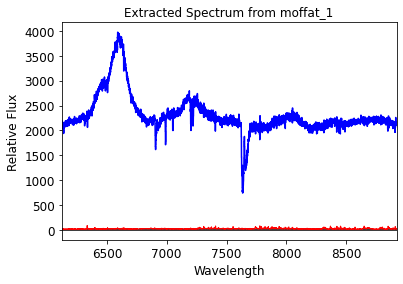

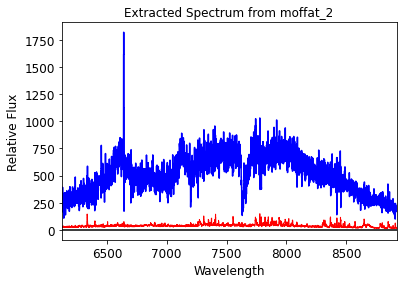

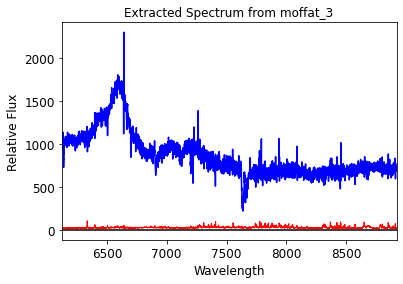

In [29]:
spec_r.extract(method='modelfit', extrange=[600, 4100])
plt.show()

 Spectrum Start:  6121.79
 Spectrum End:     8920.19
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Al III        1858.70       6431.10
Si III]       1892.00       6546.32
C III]        1908.70       6604.10


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Fe III        2075.00       7179.50
Fe II         2375.00       8217.50
Fe II         2383.00       8245.18



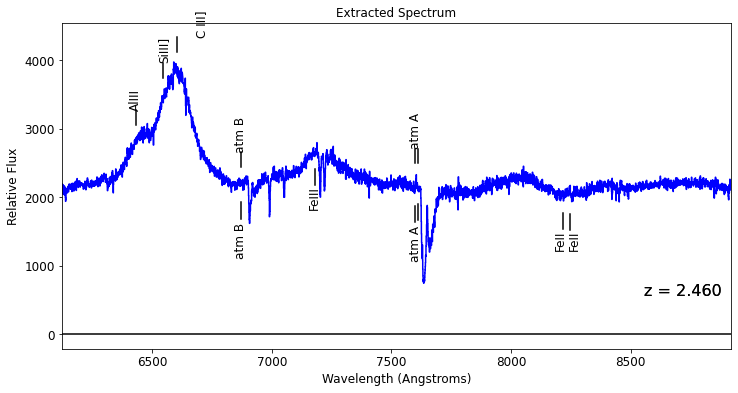

In [42]:
fg = plt.figure(figsize=(12, 6))
sp = spec1d.Spec1d(flux=spec_r.spectra[0][1]['flux'][0:-1], wav=spec_r.spectra[0][1]['wav'][0:-1])
sp.smooth(1, fig=fg)
sp.mark_lines('strongem', z=2.46, usesmooth=True)
sp.mark_lines('abs', z=2.46, usesmooth=True)

 Spectrum Start:  6121.79
 Spectrum End:     8920.19
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Al III        1858.70       6431.10
Si III]       1892.00       6546.32
C III]        1908.70       6604.10
C II]         2326.00       8047.96
[Ne IV]       2423.00       8383.58



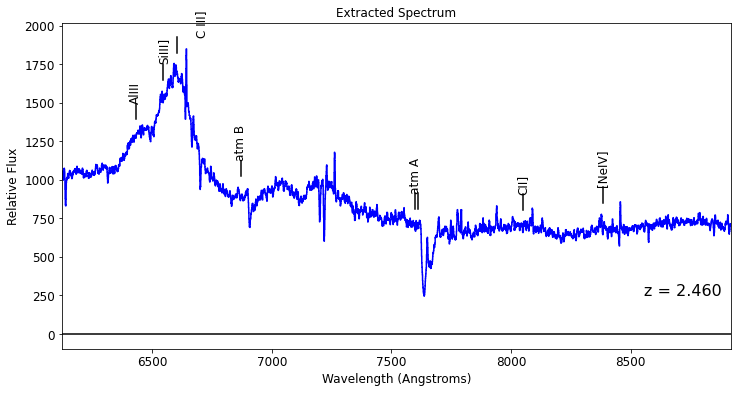

In [49]:
fg = plt.figure(figsize=(12, 6))
sp1 = spec1d.Spec1d(flux=spec_r.spectra[2][1]['flux'][0:-1], wav=spec_r.spectra[2][1]['wav'][0:-1])
sp1.smooth(5, fig=fg)
sp1.mark_lines('em', z=2.46, usesmooth=True)

 Spectrum Start:  6121.79
 Spectrum End:     8920.19
 Dispersion (1st pixel):   0.80
 Dispersion (average):      0.80



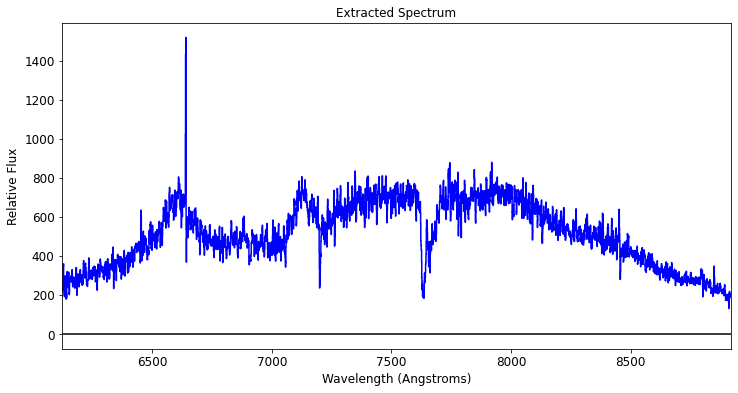

In [51]:
fg = plt.figure(figsize=(12, 6))
sp2 = spec1d.Spec1d(flux=spec_r.spectra[1][1]['flux'][0:-1], wav=spec_r.spectra[1][1]['wav'][0:-1])
sp2.smooth(3, fig=fg)

## Blue side

Profile max value (before normalization) 162.380397


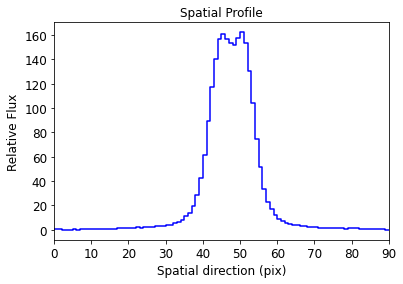


To create an initial model you first need to enter degree of background polynomial(<3) and number of Gaussian and Moffat profile as integers.
Order of background polynomial : 0
Number of Gaussian profile : 0
Number of Moffat profile : 3

Now enter constants of the background polynomial upto degree 0
c0 : 3

Enter parameter values for a Moffat profile in following format...
amplitude_value, x_0_value, gamma_value, alpha_value

Parameters of Moffat profile 1 : 160, 53, 3, 4

amplitude=160.000000, x_0=53.000000, gamma=3.000000, alpha=4.000000

Parameters of Moffat profile 2 : 40, 48, 2, 3

amplitude=40.000000, x_0=48.000000, gamma=2.000000, alpha=3.000000

Parameters of Moffat profile 3 : 150, 44, 3, 4

amplitude=150.000000, x_0=44.000000, gamma=3.000000, alpha=4.000000

Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=0.39320057)>

    [1]: <Moffat1D(amplitude=104.

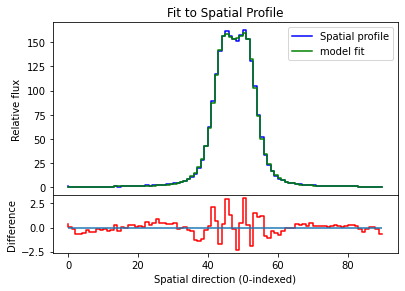

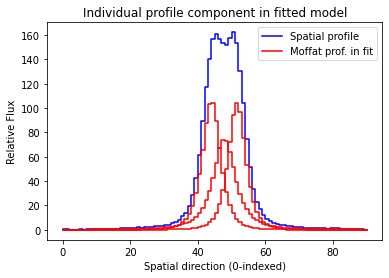


Do you want to start over ? : type yes/no
no


In [60]:
spec_b.spatial_profile(pixrange=[2000, 2300])
plt.show()
mod0 = spec_b.initial_model()


Initial model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=0.39320057)>

    [1]: <Moffat1D(amplitude=104.33121674, x_0=52.07517957, gamma=4.76025802, alpha=2.10941964)>

    [2]: <Moffat1D(amplitude=74.40877272, x_0=48.36313435, gamma=4.81856632, alpha=1.39926256)>

    [3]: <Moffat1D(amplitude=106.07836198, x_0=44.53485292, gamma=5.07896815, alpha=2.14768396)>
Parameters:
            c0_0           amplitude_1     ...      gamma_3           alpha_3      
    ------------------- ------------------ ... ----------------- ------------------
    0.39320056681362503 104.33121673666699 ... 5.078968146754791 2.1476839642312626

-------------------------------------------


Fitted model
-------------
Model: CompoundModel
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Expression: [0] + [1] + [2] + [3]
Components: 
    [0]: <Polynomial1D(0, c0=-0.92398823)>

    [1]: <Moffat1D(a

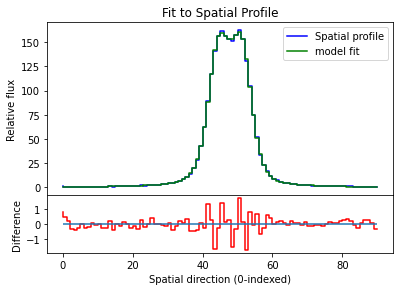

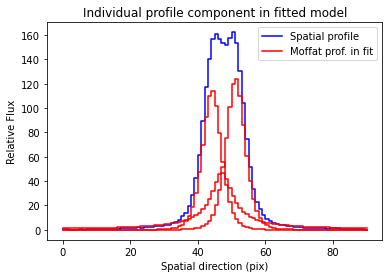

In [61]:
def tie_pos1_moffat(model):
     return model.x_0_1 - 4
            
def tie_pos2_moffat(model):
    return model.x_0_1 - 7

def tie_gamma_moffat(model):
    return model.gamma_1

def tie_alpha_moffat(model):
    return model.alpha_1 

#for sp in spec_list:
#spec1.mod0[2].x_0.tied = tie_pos1_moffat
spec_b.mod0[2].x_0.tied = tie_pos1_moffat
spec_b.mod0[3].x_0.tied = tie_pos2_moffat
#spec1.mod0[2].gamma.tied = tie_gamma_moffat
#spec1.mod0[2].alpha.tied = tie_alpha_moffat
spec_b.mod0[3].gamma.tied = tie_gamma_moffat
spec_b.mod0[3].alpha.tied = tie_alpha_moffat
spec_b.refined_model(mod0)


Running fit_trace
---------------------------------------------------------
Fitting to the trace at 163 segments
  of the 2D spectrum with stepsize=25 pix ...
    Done
Fitting polynomial of degree 3 to parameter: c0_0
Fitting polynomial of degree 4 to parameter: x_0_1
Fitting polynomial of degree 3 to parameter: gamma_1
Fitting polynomial of degree 3 to parameter: alpha_1
Fitting polynomial of degree 4 to parameter: x_0_2
Fitting polynomial of degree 3 to parameter: gamma_2
Fitting polynomial of degree 3 to parameter: alpha_2
Fitting polynomial of degree 4 to parameter: x_0_3
Fitting polynomial of degree 3 to parameter: gamma_3
Fitting polynomial of degree 3 to parameter: alpha_3


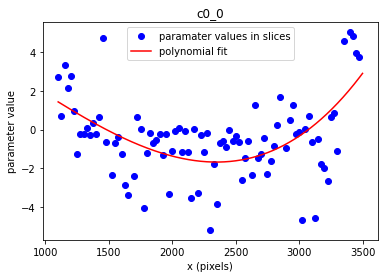

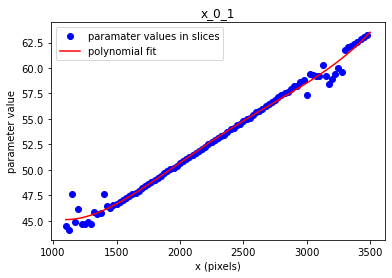

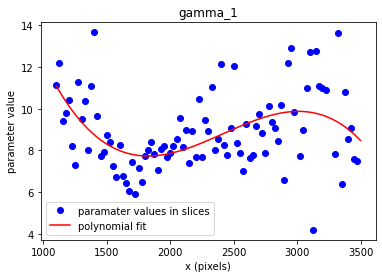

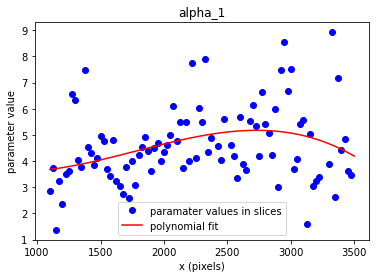

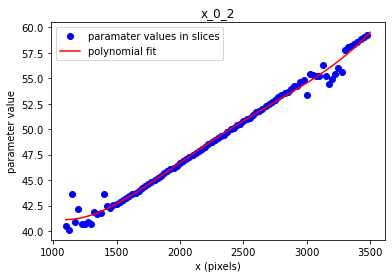

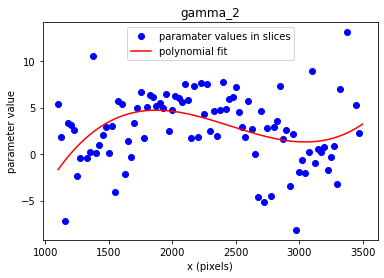

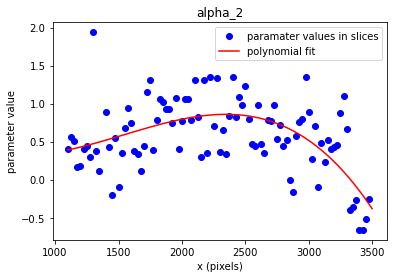

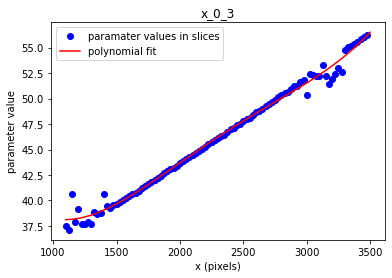

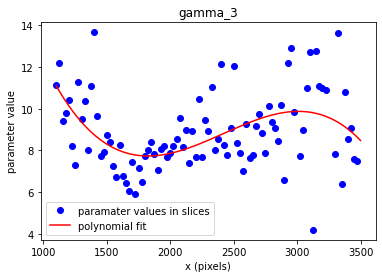

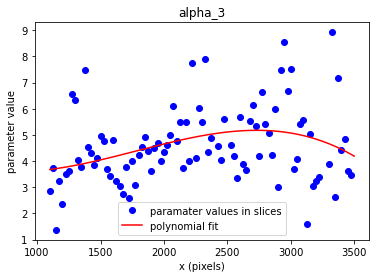

In [63]:
spec_b.find_and_trace(spec_b.mod0, stepsize=25, fitorder={'x_0_1':4, 'x_0_2':4, 'x_0_3':4, 'mean_1':4},
                    fitrange=[1100, 3500], polyorder=3)
plt.show()

Fitting to 3 components, plus a background
Extracting the spectrum.  Please be patient
 Extraction range (pixels): 1100 - 3500
Fitting to the trace at 4096 segments
  of the 2D spectrum with stepsize=1 pix ...
 Spectrum Start:  3727.33
 Spectrum End:     5190.72
 Dispersion (1st pixel):   0.61
 Dispersion (average):      0.61

 Spectrum Start:  3727.33
 Spectrum End:     5190.72
 Dispersion (1st pixel):   0.61
 Dispersion (average):      0.61

 Spectrum Start:  3727.33
 Spectrum End:     5190.72
 Dispersion (1st pixel):   0.61
 Dispersion (average):      0.61


Plotting the spectrum


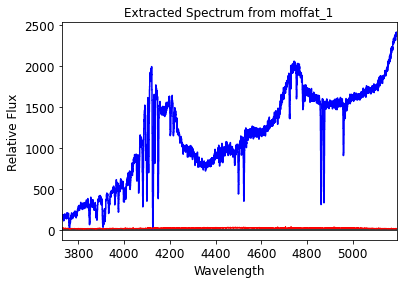

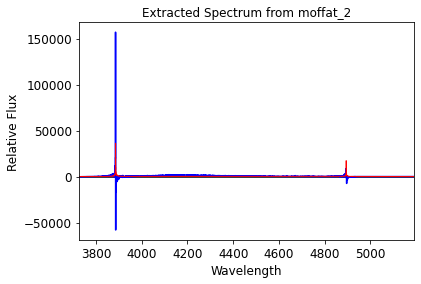

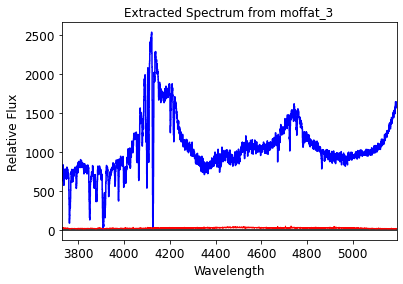

In [64]:
spec_b.extract(method='modelfit', extrange=[1100, 3500])
plt.show()

 Spectrum Start:  3727.33
 Spectrum End:     5190.11
 Dispersion (1st pixel):   0.61
 Dispersion (average):      0.61


Line        lambda_rest  lambda_obs
----------  -----------  -----------
Ly-alpha      1216.00       4183.04
N V           1240.10       4265.94
Si II         1263.30       4345.75
O I           1303.50       4484.04
C II          1334.53       4590.78
Si IV/O IV    1400.00       4816.00
N IV]         1486.50       5113.56


Line        lambda_rest  lambda_obs
----------  -----------  -----------


No lines of the requested type within the wavelength
 range covered by this spectrum.



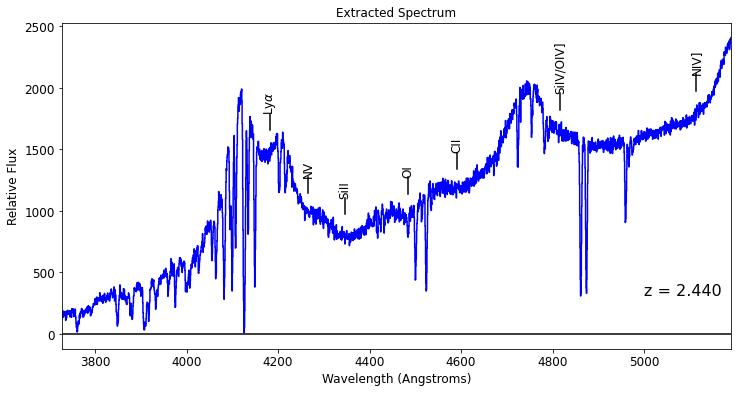

In [67]:
fg = plt.figure(figsize=(12, 6))
sp = spec1d.Spec1d(flux=spec_b.spectra[0][1]['flux'][0:-1], wav=spec_b.spectra[0][1]['wav'][0:-1])
sp.smooth(1, fig=fg)
sp.mark_lines('strongem', z=2.44, usesmooth=True, markatm=False)
sp.mark_lines('abs', z=2.44, usesmooth=True, markatm=False)

 Spectrum Start:  3898.13
 Spectrum End:     5190.11
 Dispersion (1st pixel):   0.61
 Dispersion (average):      0.61



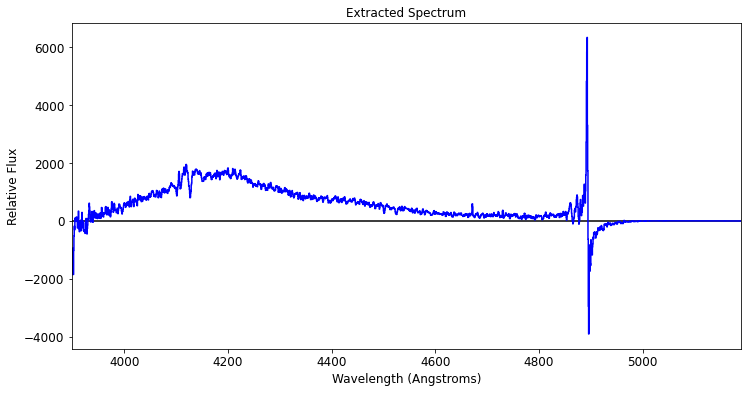

In [77]:
fg = plt.figure(figsize=(12, 6))
sp1 = spec1d.Spec1d(flux=spec_b.spectra[1][1]['flux'][280:-1], wav=spec_b.spectra[1][1]['wav'][280:-1])
sp1.smooth(3, fig=fg)
#sp1.mark_lines('strongem', z=2.44, usesmooth=True, markatm=False)
#sp1.mark_lines('abs', z=2.44, usesmooth=True, markatm=False)